In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
sns.set_style('white')

from pandas import DataFrame

1. TOTAL
2. FOLD 별

# Path
---

### 1)

In [2]:
load_path_t=r"/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl/total.csv" 

In [3]:
load_path_t

'/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl/total.csv'

### 2)

In [40]:
load_path_f=r"/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl" 
data_paths_f_info = glob.glob(os.path.join(load_path_f, 'kfold_*'))

In [41]:
len(data_paths_f_info)

10

## Data
---



## 1)

In [6]:
data_t=pd.read_csv(load_path_t)

renew_data=[]
renew_r=data_t[["patient_id","tx_phase","angle_class_r","distance(r)","prediction_class_r","regression_distance_r"]]
renew_data_r=renew_r.values

renew_l=data_t[["patient_id","tx_phase","angle_class_l","distance(l)","prediction_class_l","regression_distance_l"]]
renew_data_l=renew_l.values

In [7]:
renew_data=[]
for i in range(len(renew_data_r)):
    renew_data.append(renew_data_r[i])
    renew_data.append(renew_data_l[i])

print(len(renew_data))
data_total = DataFrame(renew_data,columns=["patient_id","tx_phase","angle_class","distance","prediction_class","regression_distance"])
data_total.to_csv("/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl/total_rl.csv", mode='w')

4018


In [8]:
data_total

,patient_id,tx_phase,angle_class,distance,prediction_class,regression_distance
0,QH0044,Pre-Tx,1,6.94,1.0,1.062
1,QH0044,Pre-Tx,1,4.63,1.0,0.980
2,QH0059,Pre-Tx,0,1.13,-0.0,-0.039
3,QH0059,Pre-Tx,0,0.81,-0.0,-0.007
4,QH0126,Pre-Tx,1,3.07,1.0,0.801
...,...,...,...,...,...,...
4013,QH0556,Post-Tx,0,-0.60,-1.0,-0.782
4014,QH0884,Pre-Tx,-1,-1.92,-1.0,-0.952
4015,QH0884,Pre-Tx,-1,-4.50,-1.0,-0.954
4016,QH1058,Post-Tx,0,2.00,1.0,0.925


target_data_t=data_total["angle_class"]
target_data_t=np.array(target_data_t)
# target_data_t=np.concatenate((data_t["angle_class_r"],data_t["angle_class_l"]),axis=-1)

predict_data_t=data_total["prediction_class"]
predict_data_t=np.array(predict_data_t)
# predict_data_t=np.concatenate((data_t["prediction_class_r"],data_t["prediction_class_l"]),axis=-1)

regression_data_t=data_total["regression_distance"]
regression_data_t=np.array(target_data_t)
# regression_data_t=np.concatenate((data_t["regression_distance_r"],data_t["regression_distance_l"]),axis=-1)

distance_data_t=data_total["distance"]
distance_data_t=np.array(target_data_t)
# distance_data_t=np.concatenate((data_t["distance(r)"],data_t["distance(l)"]),axis=-1)


target_data_t=target_data_t[...,np.newaxis]
predict_data_t=predict_data_t[...,np.newaxis]
regression_data_t=regression_data_t[...,np.newaxis]
distance_data_t=distance_data_t[...,np.newaxis]

In [10]:
print(target_data_t.shape)
print(predict_data_t.shape)
print(regression_data_t.shape)
print(distance_data_t.shape)

(4018, 1)
(4018, 1)
(4018, 1)
(4018, 1)


In [11]:
data_total["patient_id"][0]

'QH0044'

In [14]:
# class 1 missing
class1_missing_index=[]
class2_missing_index=[]
class3_missing_index=[]

for i in range(len(data_total)):
    
    # class 1 missing
    if data_total["angle_class"][i]==0:
        if data_total["prediction_class"][i]!=0:
            class1_missing_index.append([data_total["patient_id"][i],data_total["tx_phase"][i],data_total["distance"][i],data_total["regression_distance"][i]])
            
    if data_total["angle_class"][i]==1:
        if data_total["prediction_class"][i]!=1:
            class2_missing_index.append([data_total["patient_id"][i],data_total["tx_phase"][i],data_total["distance"][i],data_total["regression_distance"][i]])
            
    if data_total["angle_class"][i]==-1:
        if data_total["prediction_class"][i]!=-1:
            class3_missing_index.append([data_total["patient_id"][i],data_total["tx_phase"][i],data_total["distance"][i],data_total["regression_distance"][i]])
            
            

class1_missing_index=np.array(class1_missing_index)
class2_missing_index=np.array(class2_missing_index)
class3_missing_index=np.array(class3_missing_index)

In [15]:
len(data_total)

4018

In [16]:
class1_missing_index.shape

(270, 4)

In [19]:
class2_missing_index.shape

(236, 4)

In [20]:
class3_missing_index.shape

(340, 4)

## 2)

In [42]:
def load_data(fold):
    
    data_path_f=f"/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl/kfold_{str(fold+1).zfill(2)}/info.csv"
    data_f=pd.read_csv(data_path_f)
    print(data_path)
    
    regression_Data_f=np.concatenate((data_f["regression_distance_r"],data_f["regression_distance_l"]),axis=-1)
    regression_Data_f=np.expand_dims(regression_Data_f,axis=-1)

    distance_f=np.concatenate((data_f["distance(r)"],data_f["distance(l)"]),axis=-1)
    distance_f=np.expand_dims(distance_f,axis=-1)

    for i in range(regression_Data_f.shape[0]):
        regression_Data_f[i][0]=np.round(regression_Data_f[i][0],2)
        
    hist_data=np.concatenate((regression_Data,distance),axis=-1)
    
#     return hist_data
    hist_count=[]
    hist_data2=np.unique(regression_Data)
    

    for j in range(len(hist_data2)):
        count=0
        for i in range(len(regression_Data)):
            if regression_Data[i]==hist_data2[j]:
                count += 1
        
        hist_count.append(count)   
    
    return hist_data2, hist_count

In [43]:
data_path = '../results/prototype_regression_so_img/so_rl/kfold_01/info.csv'

In [44]:
data = pd.read_csv(data_path)
data

,Unnamed: 0,patient_id,tx_phase,angle_class_r,angle_class_l,distance(r),distance(l),prediction_class_r,prediction_class_l,regression_distance_r,regression_distance_l
0,4,QH0044,Pre-Tx,1,1,6.94,4.63,1.0,1.0,1.062,0.980
1,6,QH0059,Pre-Tx,0,0,1.13,0.81,-0.0,-0.0,-0.039,-0.007
2,28,QH0126,Pre-Tx,1,1,3.07,1.82,1.0,0.0,0.801,0.222
3,31,QH0129,Post-Tx,0,-1,0.44,0.88,-1.0,-1.0,-0.894,-0.612
4,33,QH0145,Post-Tx,-1,-1,-1.54,-1.93,-1.0,-1.0,-0.787,-0.873
...,...,...,...,...,...,...,...,...,...,...,...
196,1961,QH0542,Post-Tx,1,1,6.60,4.91,1.0,1.0,0.977,0.937
197,1980,QH0854,Pre-Tx,1,1,1.88,3.69,1.0,1.0,0.933,0.979
198,1998,QH1024,Post-Tx,0,1,1.05,7.29,0.0,1.0,0.038,1.024
199,2000,QH1037,Post-Tx,0,0,0.57,0.45,0.0,1.0,0.027,0.716


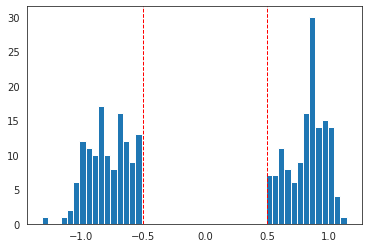

In [115]:
# REGRESSION HISTOGRAM 
threshold = 0.5
binwidth=0.05
c1=[]
for i in range(len(class1_missing_index)):
    c1.append(round(float(class1_missing_index[:,3][i]),2))    
    
plt.hist(c1, bins=np.arange(min(c1), max(c1) + binwidth, binwidth))


# a = c[(c>-0.3)&(c<0.5)]
# plt.hist(c1)

plt.axvline(-threshold, color='r', linestyle='dashed', linewidth=1)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1)




In [105]:
c1_count_1=0
c1_count_m1=0

for i in range(len(c1)):
    if threshold<=c1[i]:
        c1_count_1+=1
    elif c1[i]<-threshold:
        c1_count_m1+=1

In [97]:
count_1

142

In [98]:
count_m1

128

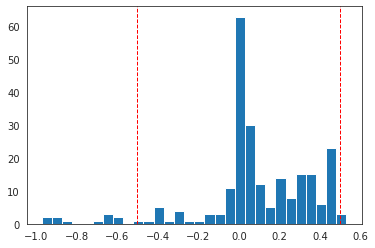

In [116]:
# REGRESSION HISTOGRAM 
threshold = 0.5
binwidth=0.05
c2=[]
for i in range(len(class2_missing_index)):
    c2.append(round(float(class2_missing_index[:,3][i]),2))    

plt.hist(c2, bins=np.arange(min(c2), max(c2) + binwidth, binwidth))
# a = c[(c>-0.3)&(c<0.5)]
# plt.hist(c2)

plt.axvline(-threshold, color='r', linestyle='dashed', linewidth=1)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1)

In [106]:
c2_count_0=0
c2_count_m1=0

for i in range(len(c2)):
    if -threshold<=c2[i]<threshold:
        c2_count_0+=1
    elif c2[i]<-threshold:
        c2_count_m1+=1

In [107]:
c2_count_0

224

In [108]:
c2_count_m1

11

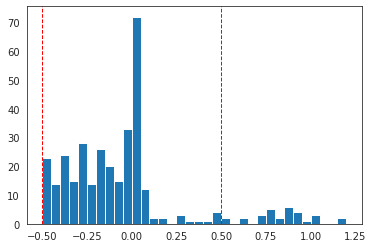

In [117]:
# REGRESSION HISTOGRAM 
threshold = 0.5
c3=[]
for i in range(len(class3_missing_index)):
    c3.append(round(float(class3_missing_index[:,3][i]),2))  
    
plt.hist(c3, bins=np.arange(min(c3), max(c3) + binwidth, binwidth))    
# a = c[(c>-0.3)&(c<0.5)]
# plt.hist(c3)

plt.axvline(-threshold, color='r', linestyle='dashed', linewidth=1)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1)

In [111]:
c3_count_0=0
c3_count_1=0

for i in range(len(c3)):
    if -threshold<=c3[i]<threshold:
        c3_count_0+=1
    elif threshold<=c3[i]:
        c3_count_1+=1

In [112]:
c3_count_0

310

In [113]:
c3_count_1

30

# plot histogram
---

In [217]:
def plot_histogram(fold,hist_data2,hist_count, lim1, lim2, threshold):
    
    bins=list(range(-200,200,1))

    for i in range(len(bins)):
        bins[i]=bins[i]/100
    
    plt.figure(figsize=(20,10))
    plt.title(f"fold{fold}")
    plt.hist(hist_data2, bins=bins, weights=hist_count, density=True, alpha=0.7, histtype='stepfilled')
   
    plt.xlim([-lim1,lim1])
    plt.ylim([0,lim2])
    
    plt.ylabel('sample_num')
    plt.xlabel('regression_distance')
    
    plt.axvline(-threshold, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1)
    
    plt.show()

In [161]:
bins=list(range(-200,200,1))

for i in range(len(bins)):
    bins[i]=bins[i]/100

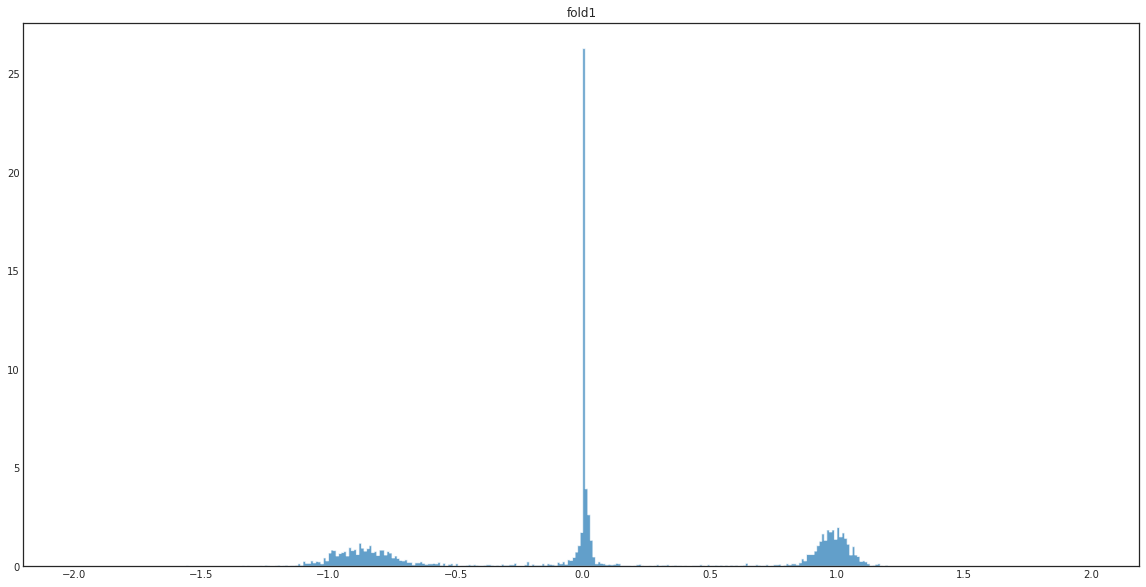

In [160]:
plt.figure(figsize=(20,10))
plt.title("fold1")
plt.hist(hist_data2, bins=bins, weights=hist_count, density=True, alpha=0.7, histtype='stepfilled')
plt.show()

# MAIN
---

/sgcwhb/Malocclusion/results/prototype_regression_so_img/so_rl/kfold_02/info.csv


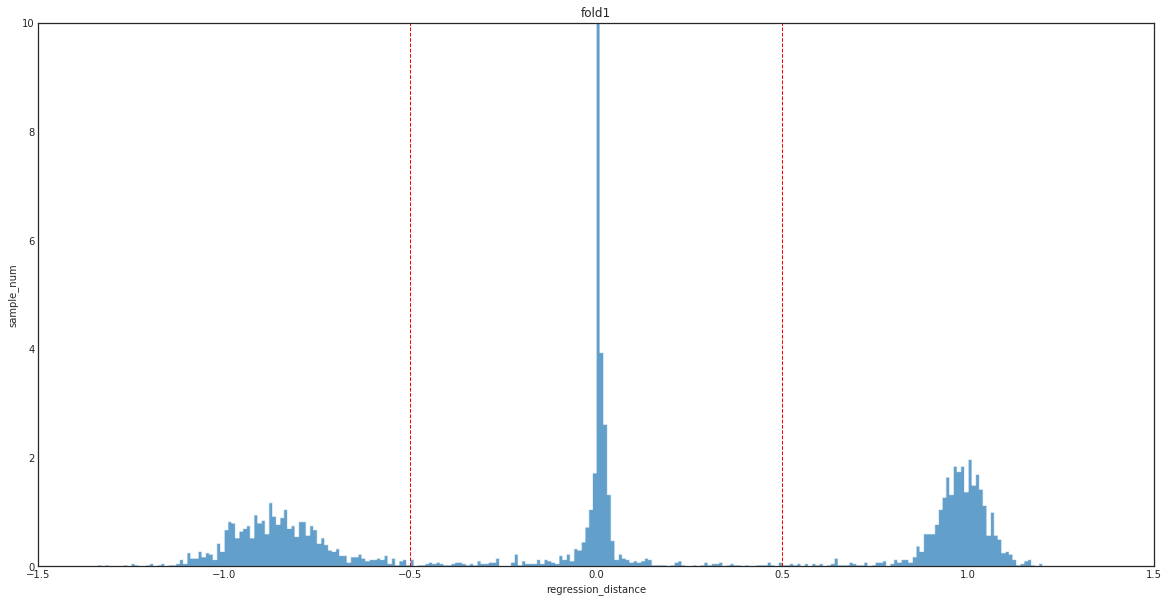

In [218]:

load_data(1)
plot_histogram(1,hist_data2,hist_count,1.5,10,0.5)


In [239]:
df = pd.DataFrame([ x for x in zip(hist_data2,hist_count)])

In [243]:
columns=['regression_distance','num']
df.to_csv("/sgcwhb/Malocclusion/results/prototype_regression_so_img/regression_histogram.csv",index = False )